In [188]:
import pandas as pd

## Resúmen de datos

Datos obtenidos en [datos.gob.ar](https://datos.gob.ar)

### Índice de precios al consumidor IPC resto. Mensual (99.3_IR_2008_0_9)
* Temas: Precios

* Frecuencia de actualización: Mensual

* Unidades: Índice abr-2008=100

* Dataset: Índice de Precios al Consumidor GBA (IPC-GBA). Base abril 2008. SERIE DISCONTINUADA

* Distribución: Índice de Precios al Consumidor GBA, por grupos. Datos mensuales. Base abril 2008.

* Responsable de publicación: Subsecretaría de Programación Macroeconómica

* Fecha de publicación: 2017-09-28

* Fuente primaria: Instituto Nacional de Estadística y Censos (INDEC)

* Cobertura temporal: 2006-12 a 2013-12 (85 valores)

In [189]:
ipc_base_08 = pd.read_csv(
    "./data/IPC/indice-precios-al-consumidor-apertura-por-grupos-base-2008-mensual.csv")
ipc_base_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   indice_tiempo                             85 non-null     object 
 1   ipc_nivel_general                         85 non-null     float64
 2   ipc_estacionales                          85 non-null     float64
 3   ipc_regulados                             85 non-null     float64
 4   ipc_resto                                 85 non-null     float64
 5   precios_relativos_estacionales_ipc_resto  85 non-null     float64
 6   precios_relativos_regulados_ipc_resto     85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [190]:
ipc_base_08_ng = ipc_base_08[["indice_tiempo", "ipc_nivel_general"]].set_index(
    "indice_tiempo").rename(columns={"ipc_nivel_general": "nivel_general"})


<AxesSubplot:xlabel='indice_tiempo'>

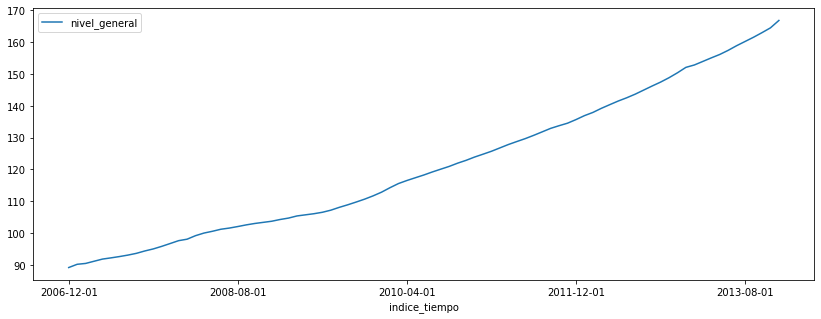

In [281]:
ipc_base_08_ng.plot(figsize=(14,5))

### Nivel general índice mensual urbano (124.3_NGI_OCTU_0_20)
* Temas: Precios

* Frecuencia de actualización: Mensual

* Unidades: Índice oct-2013/sep-2014=100

* Dataset: Índice de Precios al Consumidor Nacional Urbano (IPC-NU). Base 10/2013 - 9/2014. SERIE DISCONTINUADA

* Distribución: Índice de Precios al Consumidor Nacional Urbano, principales aperturas. Datos mensuales (Base Octubre13 Septiembre14)

* Responsable de publicación: Subsecretaría de Programación Macroeconómica

* Fecha de publicación: 2017-09-28

* Fuente primaria: Instituto Nacional de Estadística y Censos (INDEC)

* Cobertura temporal: 2013-12 a 2015-10 (23 valores)

In [192]:
ipc_base_oct13_sept14 = pd.read_csv(
    "./data/IPC/indice-precios-al-consumidor-nacional-urbano-principales-aperturas-base-oct-13-sep-14-mensual.csv"
)
ipc_base_oct13_sept14.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   indice_tiempo                                 23 non-null     object 
 1   nivel_general_indice                          23 non-null     float64
 2   alimentos_bebidas                             23 non-null     float64
 3   alimentos_consumir_hogar                      23 non-null     float64
 4   productos_panificacion_cereales_pastas        23 non-null     float64
 5   carnes                                        23 non-null     float64
 6   carne_vacuna                                  23 non-null     float64
 7   otras_carnes_rojas_frescas                    23 non-null     float64
 8   carne_ave                                     23 non-null     float64
 9   pescados_mariscos_frescos_congelados          23 non-null     float

<AxesSubplot:xlabel='indice_tiempo'>

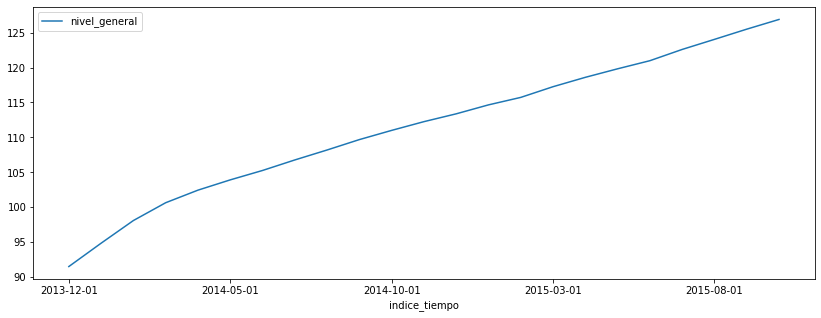

In [280]:
ipc_base_oct13_sept14_ng = ipc_base_oct13_sept14[["indice_tiempo","nivel_general_indice"]].set_index("indice_tiempo").rename(columns={"nivel_general_indice":"nivel_general"})
ipc_base_oct13_sept14_ng.plot(figsize=(14,5))

### Nivel de precios de nivel general (193.1_NIVEL_GENERAL_JULI_0_13)
* Temas: Precios

* Frecuencia de actualización: Mensual

* Unidades: Índice base 100

* Dataset: Índice de Precios al Consumidor de la Ciudad de Buenos Aires. Nivel general y principales aperturas

* Distribución: Índice de Precios al Consumidor de la Ciudad de Buenos Aires. Nivel general y principales aperturas. Base julio 2011 - junio 2012 = 100

* Responsable de publicación: Subsecretaría de Programación Macroeconómica

* Fecha de publicación: 2017-10-05

* Fuente primaria: Dirección General de Estadística y Censos - Ministerio de Hacienda GCBA

* Cobertura temporal: 2012-07 a 2021-12 (114 valores)

In [194]:
ipc_caba_base_jul12 = pd.read_csv("./data/IPC/indice-precios-consumidor-caba-jul-2012-100.csv")
ipc_caba_base_jul12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   indice_tiempo                                  113 non-null    object 
 1   nivel_general                                  113 non-null    float64
 2   alimentos_bebidas_no_alcoholicas               113 non-null    float64
 3   bebidas_alcoholicas_tabaco                     113 non-null    float64
 4   prendas_vestir_calzado                         113 non-null    float64
 5   vivienda_agua_electricidad_otros_combustibles  113 non-null    float64
 6   equipamiento_mantenimiento_hogar               113 non-null    float64
 7   salud                                          113 non-null    float64
 8   transporte                                     113 non-null    float64
 9   comunicaciones                                 113 non

<AxesSubplot:xlabel='indice_tiempo'>

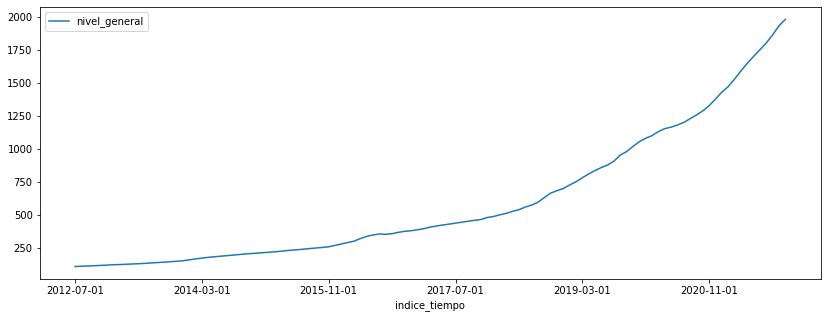

In [282]:

ipc_caba_base_jul12_ng = ipc_caba_base_jul12[["indice_tiempo", "nivel_general"]].set_index("indice_tiempo")
ipc_caba_base_jul12_ng.plot(figsize=(14,5))

<AxesSubplot:xlabel='indice_tiempo'>

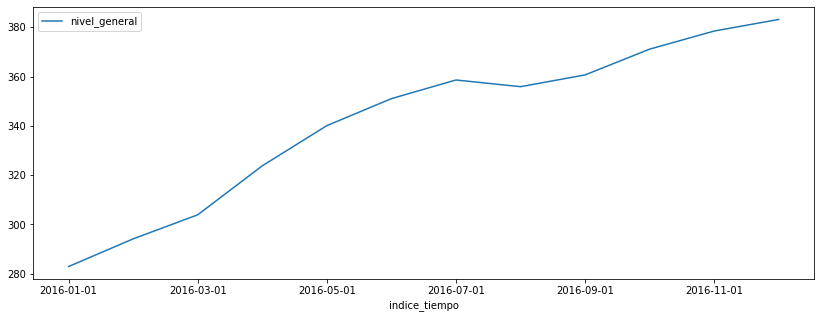

In [284]:
ipc_caba_base_jul12_ng.loc["2016-01-01":"2016-12-01"].plot(figsize=(14,5))

### IPC. Nivel General Nacional. Base dic 2016. Mensual. (148.3_INIVELNAL_DICI_M_26)
Temas: Precios

Frecuencia de actualización: Mensual

Unidades: Índice

Dataset: Índice de Precios al Consumidor Nacional (IPC). Base diciembre 2016.

Distribución: Índice de Precios al Consumidor, por categorías y regiones. Base diciembre de 2016. Valores mensuales

Responsable de publicación: Subsecretaría de Programación Macroeconómica

Fecha de publicación: 2017-09-28

Fuente primaria: Instituto Nacional de Estadística y Censos (INDEC)

Cobertura temporal: 2016-12 a 2021-12 (61 valores)

In [196]:
ipc_base_dic16 = pd.read_csv(
    "./data/IPC/indice-precios-al-consumidor-apertura-por-categorias-base-diciembre-2016-mensual.csv")
ipc_base_dic16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   indice_tiempo                61 non-null     object 
 1   ipc_nivel_general_nacional   61 non-null     float64
 2   ipc_estacionales_nacional    61 non-null     float64
 3   ipc_nucleo_nacional          61 non-null     float64
 4   ipc_regulados_nacional       61 non-null     float64
 5   ipc_nivel_general_gba        61 non-null     float64
 6   ipc_estacionales_gba         61 non-null     float64
 7   ipc_nucleo_gba               61 non-null     float64
 8   ipc_regulados_gba            61 non-null     float64
 9   ipc_nivel_general_pampeana   61 non-null     float64
 10  ipc_estacionales_pampeana    61 non-null     float64
 11  ipc_nucleo_pampeana          61 non-null     float64
 12  ipc_regulados_pampeana       61 non-null     float64
 13  ipc_nivel_general_nea 

<AxesSubplot:xlabel='indice_tiempo'>

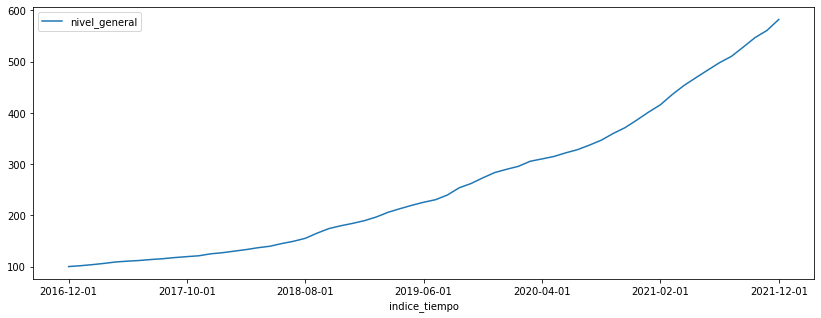

In [287]:

ipc_base_dic16_ng = ipc_base_dic16[[
    "indice_tiempo", "ipc_nivel_general_nacional"]].set_index(
        "indice_tiempo"
).rename(
    columns={
        "ipc_nivel_general_nacional": "nivel_general"
    }
)
ipc_base_dic16_ng.plot(figsize=(14,5))


In [289]:
ipc_base_dic16_ng.loc["2016-01-01":"2016-12-01"].plot(figsize=(14,5))

,nivel_general
indice_tiempo,
2016-12-01,100.0


## Homologación de bases IPC

Para obtener la serie de inflación en el IPC se hace una cadena de empalmes. Esto puesto que hay tres cambios de base en los últimos diez años en el cálculo del IPC. 

### Empalme de datos I

se empalman 4 series de datos:
1. IPC Indec base 2006, desde enero 2006 hasta diciembre 2013.
2. IPC Indec base 'octubre 2013 - septiembre 2014', desde enero 2013 hasta octubre 2015.
3. IPC CABA base julio 2012, desde octubre 2015 hasta diciembre 2016.
4. IPC Indec base diciembre 2016, desde diciembre 2016 hasta diciembre 2021.

#### Homologación de datos 2006 -> 2015

Se empalma serie *enero 2013 -> octubre 2015 IPC INDEC base 'octubre 2013-septiembre 2014'* con la serie *enero 2006 -> enero 2013 INDEC base 2006*, obteniendo la serie ***enero 2006 -> diciembre 2015 IPC INDEC base 'octubre 2013-septiembre 2014'***".



Para esto se encuentra el coeficiente de la base octubre 2013 a septiembre 2014 con la base 2008 

In [198]:
base_08 = ipc_base_08_ng.loc["2013-12-01"].at["nivel_general"]
base_oct13_sept14 = ipc_base_oct13_sept14_ng.loc["2013-12-01"].at["nivel_general"]
ce_08_to_oct13sept14 = base_oct13_sept14/base_08
print(f"base oct14-sept15       {base_oct13_sept14}")
print(f"base 2008:              {base_08}")
print(f"coeficiente de empalme  {ce_08_to_oct13sept14}")

base oct14-sept15       91.53459452711807
base 2008:              166.84
coeficiente de empalme  0.5486369846986219


Luego se multiplica el coeficiente de homologación por cada IPC nivel general con base 2008

In [199]:
ipc_h_08_boct13sept14_ng = ipc_base_08_ng.apply(lambda x: x*ce_08_to_oct13sept14)
"""
IPC con base 2008 Homologado con base oct 13 - sept 14
"""
ipc_h_08_boct13sept14_ng

,nivel_general
indice_tiempo,
2006-12-01,48.916474
2007-01-01,49.476083
2007-02-01,49.624215
2007-03-01,50.002775
2007-04-01,50.375848
...,...
2013-08-01,87.908104
2013-09-01,88.637791
2013-10-01,89.427829


Finalmente se concatenan ambas series, homologadas con base octubre 13 septiembre 14

In [200]:
ipc_06_to_15_base_oct13sept14 = pd.concat(
    [ipc_h_08_boct13sept14_ng, ipc_base_oct13_sept14_ng], axis=0).drop_duplicates()
"""
IPC del 2006 al 2015 con base en octubre 13 - septiembre 14
"""
# ipc_06_to_15_base_oct13sept14.to_csv("./data/IPC_H/ipc_2006_2015_base_oct13_sept14.csv")
ipc_06_to_15_base_oct13sept14


,nivel_general
indice_tiempo,
2006-12-01,48.916474
2007-01-01,49.476083
2007-02-01,49.624215
2007-03-01,50.002775
2007-04-01,50.375848
...,...
2015-06-01,120.980000
2015-07-01,122.590000
2015-08-01,124.030000


<AxesSubplot:xlabel='indice_tiempo'>

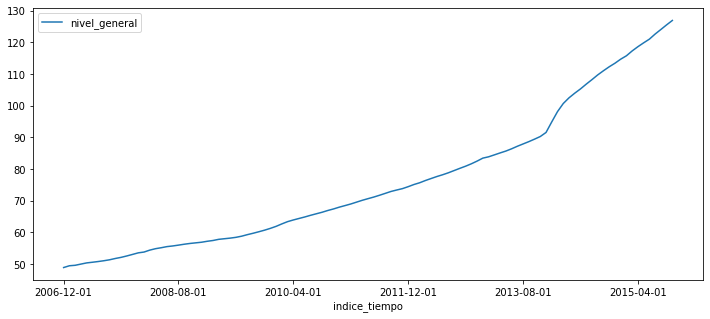

In [201]:
ipc_06_to_15_base_oct13sept14.plot(figsize=(12,5))

<AxesSubplot:xlabel='indice_tiempo'>

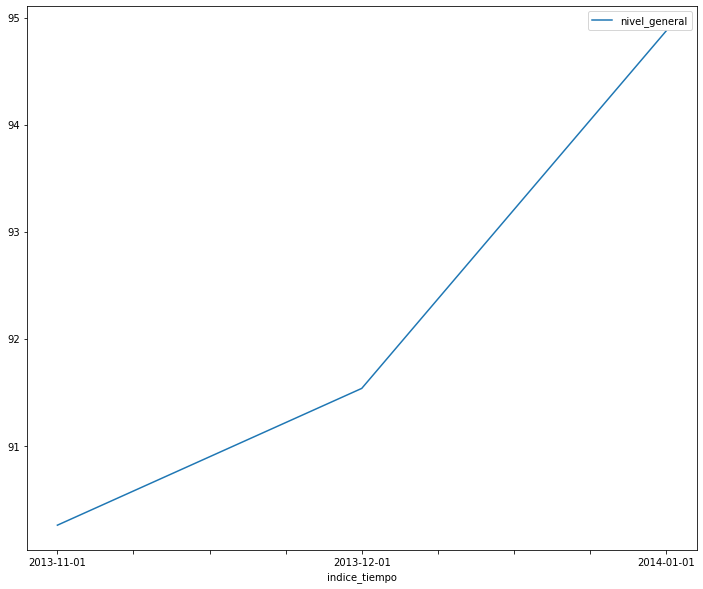

In [202]:
ipc_06_to_15_base_oct13sept14.loc["2013-11-01":"2014-01-01"].plot(figsize=(12,10))

#### Hmologación enero 2006 -> diciembre 2016

Se empalma serie *enero 2006 -> octubre 2015 IPC INDEC base 'octubre 2013-septiembre 2014'* con la serie *octubre 2015 ->  diciembre 2016 IPC CABA base 2012*, obteniendo la serie ***enero 2006 -> diciembre 2016 IPC CABA base 2012***".



Se calcula el coeficiente de empalme

In [203]:
base_oct13_sep14 = ipc_06_to_15_base_oct13sept14.loc["2015-10-01"].at["nivel_general"]
base_CABAjul12 = ipc_caba_base_jul12_ng.loc["2015-10-01"].at["nivel_general"]
ce_oct13sep14_to_CABAjul12 = base_CABAjul12 / base_oct13_sep14

print(f"""
IPC Indec base 'octubre 2013 - septiembre 2014':        {base_oct13_sept14}
IPC Caba base julio 2012:                               {base_CABAjul12}
coeficiente de empalme:                                 {ce_oct13sep14_to_CABAjul12}
""")


IPC Indec base 'octubre 2013 - septiembre 2014':        91.53459452711807
IPC Caba base julio 2012:                               256.42
coeficiente de empalme:                                 2.0209646910466583



Se aplica el coeficiente de empalme multiplicandolo por cada indice de la serie enero 2016 -> octubre 2015 INDEC base 'octubre 13 - septiembre 14'

In [204]:
tmp = ipc_06_to_15_base_oct13sept14.apply(
    lambda x: x*ce_oct13sep14_to_CABAjul12)


* muestra de la tabla:

In [205]:
tmp

,nivel_general
indice_tiempo,
2006-12-01,98.858466
2007-01-01,99.989417
2007-02-01,100.288787
2007-03-01,101.053842
2007-04-01,101.807810
...,...
2015-06-01,244.496308
2015-07-01,247.750061
2015-08-01,250.660251


Se concatenan ambas series

In [206]:

ipc_06_to_16_base_CABAjul12 = pd.concat(
    [tmp, ipc_caba_base_jul12_ng.loc["2015-10-01":]], axis=0).drop_duplicates()
    


* muestra de la serie resultado

In [207]:
ipc_06_to_16_base_CABAjul12


,nivel_general
indice_tiempo,
2006-12-01,98.858466
2007-01-01,99.989417
2007-02-01,100.288787
2007-03-01,101.053842
2007-04-01,101.807810
...,...
2021-07-01,1754.550000
2021-08-01,1805.720000
2021-09-01,1866.860000


* gráfico de la serie resultado

<AxesSubplot:xlabel='indice_tiempo'>

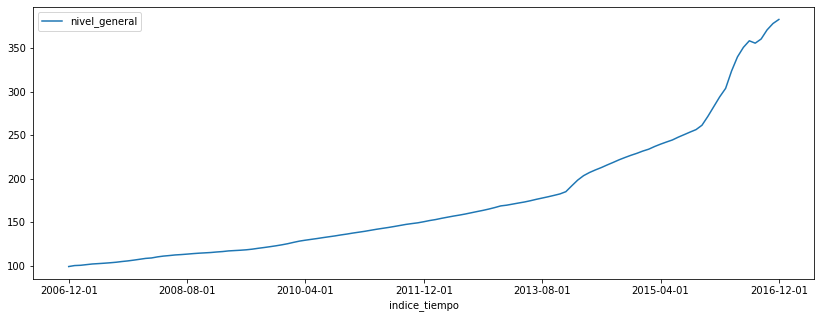

In [208]:
ipc_06_to_16_base_CABAjul12.loc[:"2016-12-1"].plot(figsize=(14,5))

#### Homologación enero 2006 -> diciembre 2021

Se empalma serie *diciembre 2016 -> diciembre 2021 IPC INDEC base diciembre 2016* con la serie *enero 2006 -> diciembre 2016 IPC CABA julio 2012*, obteniendo la serie ***enero 2006 -> diciembre 2021 IPC INDEC base diciembre 2016***".



se calcula el coeficiente de empalme

In [209]:
base_dic16 = ipc_base_dic16_ng.loc["2016-12-01"].at["nivel_general"]
base_CABAjul12 = ipc_06_to_16_base_CABAjul12.loc["2016-12-01"].at["nivel_general"]
ce_CABAjul12_to_INDECdic16 = base_dic16/base_CABAjul12

print(f"""
base INDEC diciembre 2016:          {base_dic16}
base CABA julio 2012                {base_CABAjul12}
coeficiente de empalme:             {ce_CABAjul12_to_INDECdic16}
""")


base INDEC diciembre 2016:          100.0
base CABA julio 2012                383.19
coeficiente de empalme:             0.2609671442365406



Se aplica a la serie enero 2006 -> diciembre 2016 IPC CABA base julio 2012, multiplicando cáda índice por el coeficiente de empalme

In [210]:
tmp = ipc_06_to_16_base_CABAjul12.loc[:"2016-12-01"].apply(
    lambda x: x*ce_CABAjul12_to_INDECdic16)


* muestra de la tabla

In [211]:
tmp.loc[:"2016-12-01"]

,nivel_general
indice_tiempo,
2006-12-01,25.798812
2007-01-01,26.093953
2007-02-01,26.172078
2007-03-01,26.371733
2007-04-01,26.568493
...,...
2016-08-01,92.878207
2016-09-01,94.125630
2016-10-01,96.855346


finalmente concatenamos ambas series

In [212]:
ipc_06_to_21_base_INDECdic16_I = pd.concat([tmp, ipc_base_dic16_ng]).drop_duplicates()


* muestra de la serie resultado

In [213]:
ipc_06_to_21_base_INDECdic16_I


,nivel_general
indice_tiempo,
2006-12-01,25.798812
2007-01-01,26.093953
2007-02-01,26.172078
2007-03-01,26.371733
2007-04-01,26.568493
...,...
2021-08-01,510.394200
2021-09-01,528.496800
2021-10-01,547.080200


* gráfico de la serie resultado

<AxesSubplot:xlabel='indice_tiempo'>

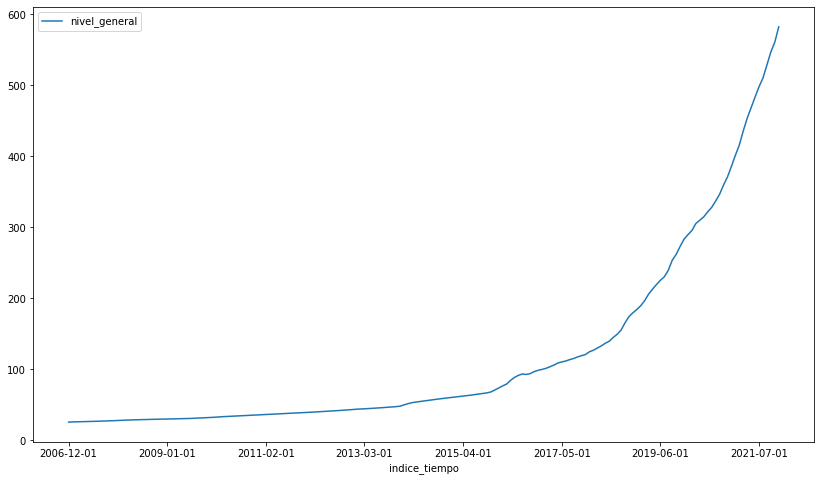

In [214]:
ipc_06_to_21_base_INDECdic16_I.plot(figsize=(14,8))

In [215]:
ipc_06_to_21_base_INDECdic16_I.to_csv("./data/IPC_H/ipc_enero2006_dic2021_homologacion_base_indec_dic2016_I.csv")

### Empalme de datos II

se empalman 3 series de datos
1. IPC Indec base 2008, desde enero 2006 hasta diciembre 2013.
2. IPC CABA base julio 2012, desde diciembre 2013 hasta diciembre 2016.
3. IPC Indec base diciembre 2016, desde diciembre 2016 hasta diciembre 2021.

#### Homologación de datos 2006 -> 2016

Se empalma la serie diciembre 2013 -> diciembre 2016 IPC CABA base julio 2012 con la serie enero 2006 -> diciembre 2013 IPC Indec base abril 2008. Obteniendo así una nueva serie: enero 2006 -> diciembre 2016 IPC Caba base julio 2012.

* muestra de la serie enero 2006 -> diciembre 2013 IPC Indec base abril 2008

In [216]:
ipc_indec_06_13 = ipc_base_08_ng # alias
ipc_indec_06_13

,nivel_general
indice_tiempo,
2006-12-01,89.16
2007-01-01,90.18
2007-02-01,90.45
2007-03-01,91.14
2007-04-01,91.82
...,...
2013-08-01,160.23
2013-09-01,161.56
2013-10-01,163.00


* muestra de la serie diciembre 2013 -> diciembre 2016 IPC CABA base julio 2012

In [217]:
ipc_caba_13_16 = ipc_caba_base_jul12_ng.loc["2013-12-01":"2016-12-01"] #alias
ipc_caba_13_16

,nivel_general
indice_tiempo,
2013-12-01,155.06
2014-01-01,162.50
2014-02-01,169.61
2014-03-01,175.80
2014-04-01,181.29
2014-05-01,185.81
2014-06-01,190.15
2014-07-01,194.38
2014-08-01,198.80


In [218]:
base_indec = ipc_indec_06_13.loc["2013-12-01"].at["nivel_general"]
base_caba = ipc_caba_13_16.loc["2013-12-01"].at["nivel_general"]
coeficiente_empalme = base_caba/base_indec
print(f"""
base caba julio 2012:   {base_caba}
base indec abril 2008:  {base_indec}
coeficiente de empalme: {coeficiente_empalme}
""")


base caba julio 2012:   155.06
base indec abril 2008:  166.84
coeficiente de empalme: 0.9293934308319348



se aplica el coeficiente de empalme multiplicandolo con la serie enero 2006 -> diciembre 2013 IPC Indec base abril 2008

In [219]:
tmp = ipc_indec_06_13.apply(lambda x: x * coeficiente_empalme)

* muestra de la serie homologada

In [220]:
tmp

,nivel_general
indice_tiempo,
2006-12-01,82.864718
2007-01-01,83.812700
2007-02-01,84.063636
2007-03-01,84.704917
2007-04-01,85.336905
...,...
2013-08-01,148.916709
2013-09-01,150.152803
2013-10-01,151.491129


Se concatenan ambas series.

In [221]:
ipc_06_to_16_base_CABAjul12 = pd.concat([tmp, ipc_caba_13_16]).drop_duplicates()


* muestra de la serie resultado ***enero 2006 -> diciembre 2016 IPC Caba base julio 2012***

In [222]:
ipc_06_to_16_base_CABAjul12

,nivel_general
indice_tiempo,
2006-12-01,82.864718
2007-01-01,83.812700
2007-02-01,84.063636
2007-03-01,84.704917
2007-04-01,85.336905
...,...
2016-08-01,355.900000
2016-09-01,360.680000
2016-10-01,371.140000


* gráfico de la serie resultado ***enero 2006 -> diciembre 2016 IPC Caba base julio 2012***

<AxesSubplot:xlabel='indice_tiempo'>

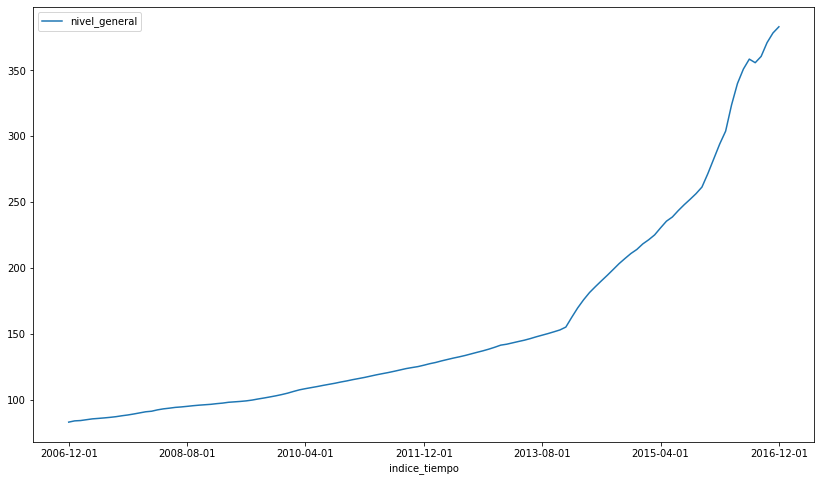

In [223]:
ipc_06_to_16_base_CABAjul12.plot(figsize=(14, 8))

#### Homologación 2006 -> 2021

Se empalma la serie diciembre 2016 -> diciembre 2021 IPC INDEC base diciembre 2016 con la serie enero 2006 -> diciembre 2016 IPC CABA base julio 2012. Obteniendo así una nueva serie: enero 2006 -> diciembre 2021 IPC INDEC base diciembre 2016.

* muestra de la serie enero 2006 -> diciembre 2016 IPC CABA base julio 2012

In [224]:
ipc_06_to_16_base_CABAjul12

,nivel_general
indice_tiempo,
2006-12-01,82.864718
2007-01-01,83.812700
2007-02-01,84.063636
2007-03-01,84.704917
2007-04-01,85.336905
...,...
2016-08-01,355.900000
2016-09-01,360.680000
2016-10-01,371.140000


se calcula el coeficiente de empalme

In [225]:
base_caba = ipc_06_to_16_base_CABAjul12.loc["2016-12-01"].at["nivel_general"]
base_indec = ipc_base_dic16_ng.loc["2016-12-01"].at["nivel_general"]
coeficiente_empalme = base_indec / base_caba

print(f"""
IPC Caba base julio 2012:       {base_caba}
IPC Indec base diciembre 2016:  {base_indec}
coeficiente de empalme:         {coeficiente_empalme}
""")


IPC Caba base julio 2012:       383.19
IPC Indec base diciembre 2016:  100.0
coeficiente de empalme:         0.2609671442365406



Se aplica el coeficiente de empalme mutiplicándolo por cada valor en la serie enero 2006 -> diciembre 2016 IPC Caba base julio 2012

In [226]:
tmp = ipc_06_to_16_base_CABAjul12.apply(lambda x : x * coeficiente_empalme)

* muestra de la serie homologada:

In [227]:
tmp

,nivel_general
indice_tiempo,
2006-12-01,21.624969
2007-01-01,21.872361
2007-02-01,21.937847
2007-03-01,22.105200
2007-04-01,22.270128
...,...
2016-08-01,92.878207
2016-09-01,94.125630
2016-10-01,96.855346


Se empalma la tabla homologada con la serie diciembre 2016 -> diciembre 2021 IPC INDEC base diciembre 2016

In [228]:
ipc_06_to_21_base_INDECdic16_II = pd.concat([tmp, ipc_base_dic16_ng]).drop_duplicates()

* muestra de la serie resultado ***enero 2006 -> diciembre 2021 IPC INDEC base diciembre 2016***

In [229]:
ipc_06_to_21_base_INDECdic16_II

,nivel_general
indice_tiempo,
2006-12-01,21.624969
2007-01-01,21.872361
2007-02-01,21.937847
2007-03-01,22.105200
2007-04-01,22.270128
...,...
2021-08-01,510.394200
2021-09-01,528.496800
2021-10-01,547.080200


* gráfico de la serie resultado ***enero 2006 -> diciembre 2021 IPC INDEC base diciembre 2016***

<AxesSubplot:xlabel='indice_tiempo'>

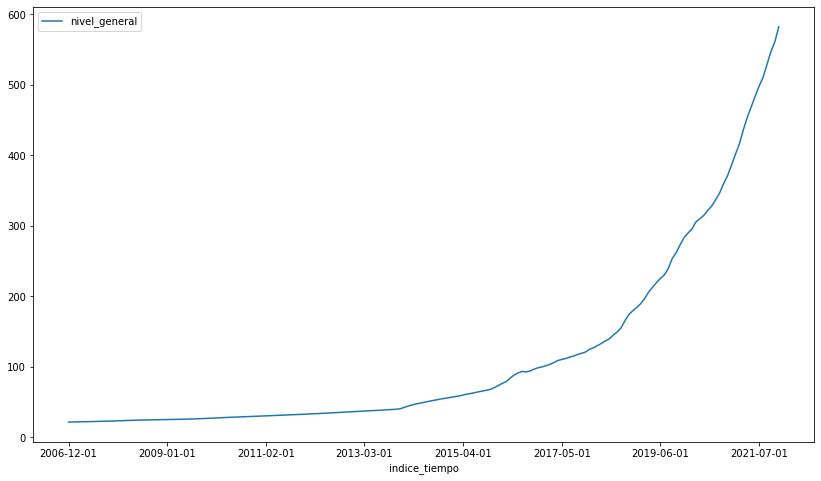

In [230]:
ipc_06_to_21_base_INDECdic16_II.plot(figsize=(14,8))

In [231]:
ipc_06_to_21_base_INDECdic16_II.to_csv("./data/IPC_H/ipc_enero2006_dic2021_homologacion_base_indec_dic2016_II.csv")

## Comparación "Empalme de datos I" y "Empalme de datos II"

In [232]:
empalme_I = ipc_06_to_21_base_INDECdic16_I
empalme_II = ipc_06_to_21_base_INDECdic16_II
ng_I = empalme_I["nivel_general"]
ng_I.name = "nivel_general_I"
ng_II = empalme_II["nivel_general"]
ng_II.name = "nivel_general_II"

¿Tienen los mismos valores en el índice?

In [233]:
pd.Index.equals(ng_I.index, ng_II.index)

True

*Tabla comparativa entre ambas series*

In [234]:
ng_comparación = pd.concat([ng_I, ng_II], axis=1)
ng_comparación

,nivel_general_I,nivel_general_II
indice_tiempo,,
2006-12-01,25.798812,21.624969
2007-01-01,26.093953,21.872361
2007-02-01,26.172078,21.937847
2007-03-01,26.371733,22.105200
2007-04-01,26.568493,22.270128
...,...,...
2021-08-01,510.394200,510.394200
2021-09-01,528.496800,528.496800
2021-10-01,547.080200,547.080200


*Gráfico comparativo entre ambas series*

<AxesSubplot:xlabel='indice_tiempo'>

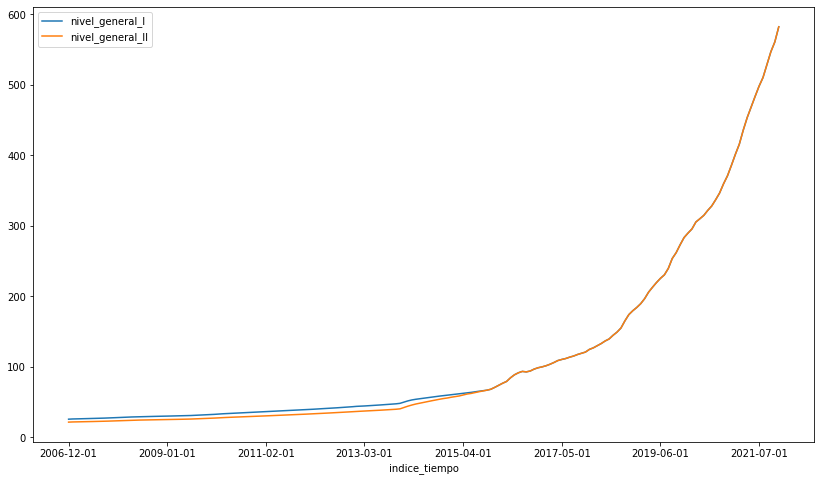

In [235]:
ng_comparación.plot(figsize=(14, 8))

En el siguiente grafico se comparan lado a lado ambas metodologías de empalme, se puede obseravar una diferencia en la variación del IPC entre diciembre 2006 y diciembre 2015

*Mismo gráfico, período diciembre 2012 - diciembre 2015.*

<AxesSubplot:xlabel='indice_tiempo'>

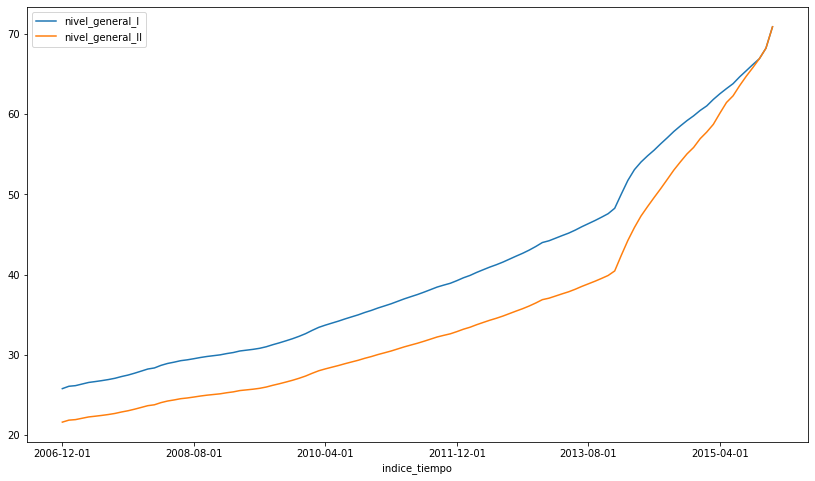

In [236]:
ng_comparación.loc["2006-12-01":"2015-12-01"].plot(figsize=(14, 8))

*Mismo gráfico, período noviembre 2013 - diciembre 2015*

<AxesSubplot:xlabel='indice_tiempo'>

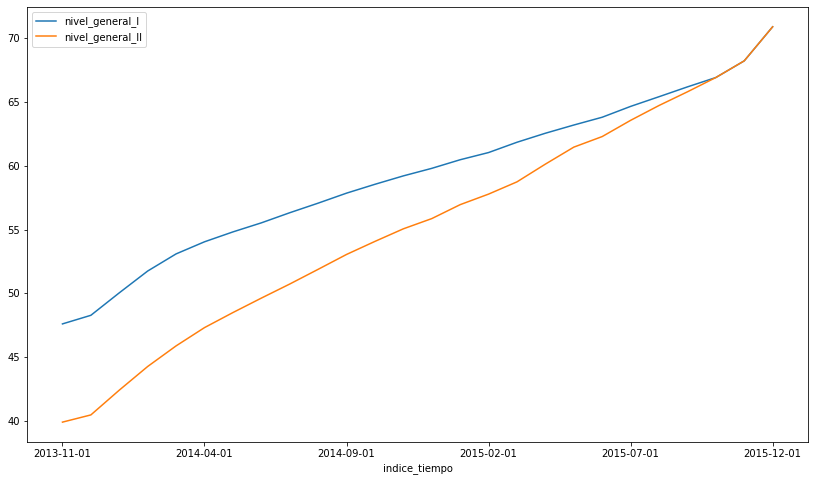

In [237]:

ng_comparación.loc["2013-11-01":"2015-12-01"].plot(figsize=(14, 8))

Nótese que ambas curvas convergen en una misma cuando se homologan los datos junto al IPC CABA base julio 2012, y sigue de forma pareja junto con la homologación de los datos que comienzan en diciembre 2016, es decir con el IPC INDEC con base en el mismo mes y año (diciembre 2016).

*variación del IPC en "Empalme I" a lo largo del tiempo*

<AxesSubplot:xlabel='indice_tiempo'>

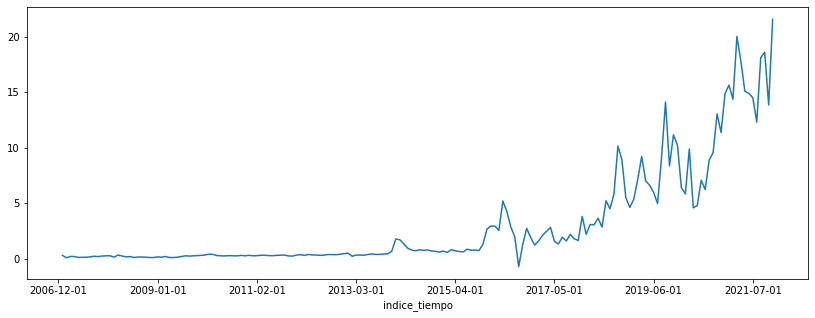

In [238]:
ng_I.diff().plot(figsize=(14,5))

*variacion del IPC en "Empalme II" a lo largo del tiempo*

<AxesSubplot:xlabel='indice_tiempo'>

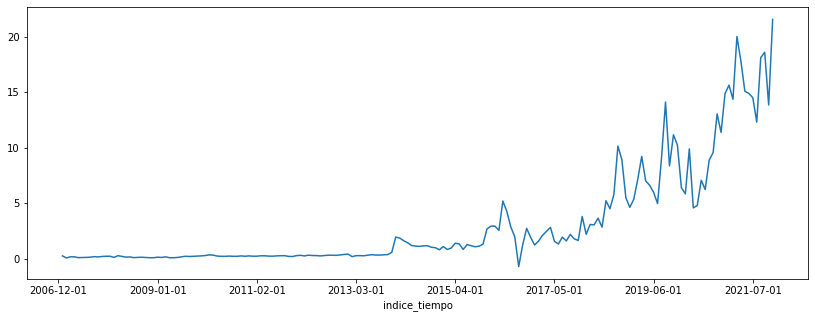

In [239]:
ng_II.diff().plot(figsize=(14,5))

*Comparación de la variacion entre 'Empalme I' y 'Empalme II'*

<AxesSubplot:xlabel='indice_tiempo'>

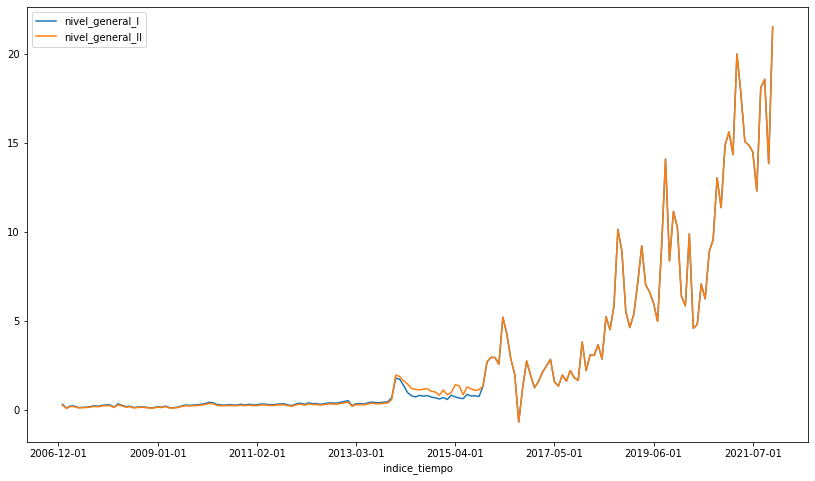

In [248]:
ng_variacion_comparacion = pd.concat([ng_I.diff(), ng_II.diff()], axis=1)
ng_variacion_comparacion.plot(figsize=(14,8))

*diferencia de la variación entre 'Empalme II' y 'Empalme I'*

<AxesSubplot:xlabel='indice_tiempo'>

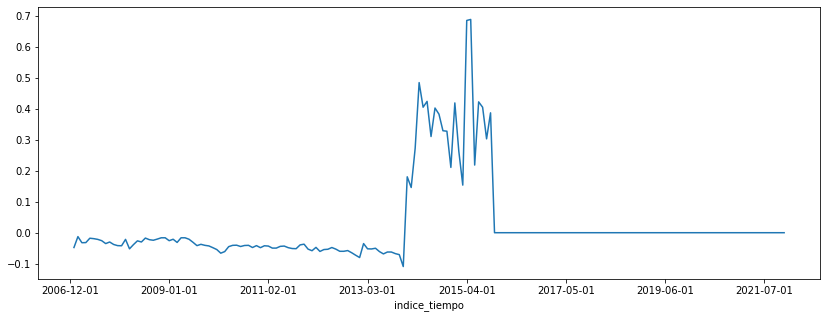

In [241]:
ng_diferencia_variacion = ng_II.diff() - ng_I.diff()
ng_diferencia_variacion.plot(figsize=(14,5))

In [278]:
nuevo = ng_I
viejo = ng_I.shift(periods=120)
ng_I_porcentaje_variacion = ((nuevo-viejo)/viejo)*100

<AxesSubplot:xlabel='indice_tiempo'>

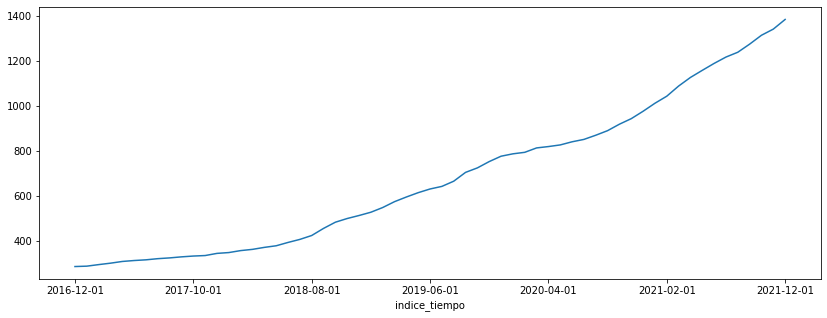

In [279]:

ng_I_porcentaje_variacion.plot(figsize=(14,5))

### Diferencia entre ambas series

*Gráfico de la diferencia entre ambas series*

<AxesSubplot:xlabel='indice_tiempo'>

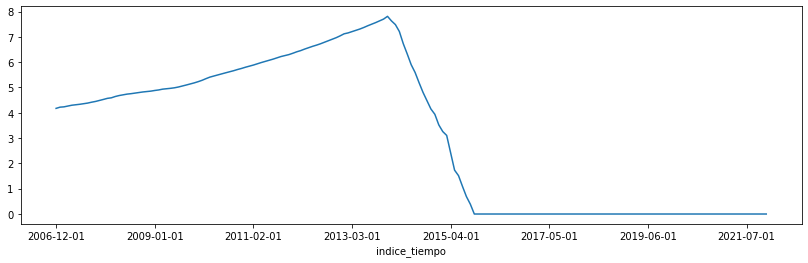

In [242]:
ng_diferencia = ng_I - ng_II
ng_diferencia.plot(figsize=(14,4))

*puntos clave del gráfico*

In [243]:
ng_diferencia.loc[["2012-12-01", "2013-12-01", "2015-10-01", "2021-12-01"]]

indice_tiempo
2012-12-01    7.039731
2013-12-01    7.810273
2015-10-01    0.000000
2021-12-01    0.000000
dtype: float64

*diferencia entre diciembre 2013 y octubre 2015*

In [244]:
ng_diferencia.loc["2013-12-01":"2015-10-1"]

indice_tiempo
2013-12-01    7.810273
2014-01-01    7.630055
2014-02-01    7.484289
2014-03-01    7.212246
2014-04-01    6.728332
2014-05-01    6.323767
2014-06-01    5.900417
2014-07-01    5.590320
2014-08-01    5.188367
2014-09-01    4.806244
2014-10-01    4.477489
2014-11-01    4.150290
2014-12-01    3.939815
2015-01-01    3.521441
2015-02-01    3.258499
2015-03-01    3.105071
2015-04-01    2.420839
2015-05-01    1.733341
2015-06-01    1.515256
2015-07-01    1.093468
2015-08-01    0.689019
2015-09-01    0.386456
2015-10-01    0.000000
dtype: float64

*variación de la diferencia entre ambas metodologías a lo largo de la serie*

<AxesSubplot:xlabel='indice_tiempo'>

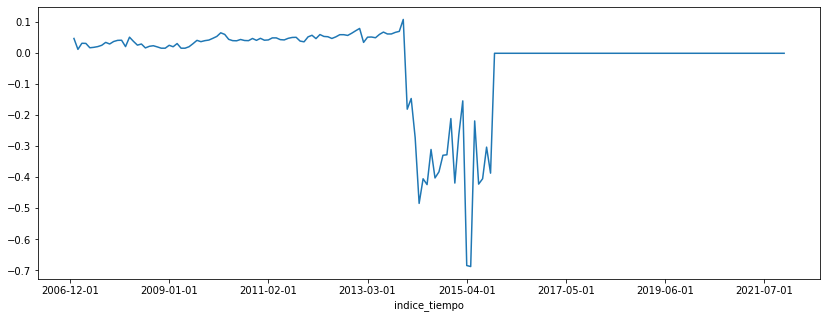

In [245]:
ng_diferencia_variacion = ng_diferencia.diff()
ng_diferencia_variacion.plot(figsize=(14,5))

La diferencia crece entre los periodos diciembre 2012 y diciembre 2013, fin de la serie IPC INDEC base abril 2008. Luego decrece abrúptamente, en el periódo diciembre 2013 y octubre 2015, correspondiente a la serie IPC INDEC base 'octubre 2013 - septiembre 2014'. Finalmente llega a cero a partir de octubr 2015, cuando se homologa junto a IPC CABA base julio 2012.

### Inflación acumulada diciembre 2006 - diciembre 2021

*Empalme I*

In [246]:
tmp = ng_I.loc["2006-12-01"]
tmp1 = ng_I.loc["2021-12-01"]
acc = (tmp1/tmp)*100
acc

2257.6912100383174

*Empalme II*

In [247]:
tmp = ng_II.loc["2006-12-01"]
tmp1 = ng_II.loc["2021-12-01"]
acc = (tmp1/tmp)*100
print(acc)

2693.448961425126
